In [1]:
#!pip install catboost
#!pip install optuna
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.3.1

In [2]:
import optuna
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import metrics
import matplotlib.pyplot as plt
import catboost as cb
from catboost import CatBoostRegressor
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, r2_score, f1_score,\
roc_auc_score,mean_absolute_error,mean_absolute_percentage_error,max_error


In [3]:
data_fin_imprt=pd.read_csv("final.csv",  delimiter=',')



In [4]:
data_fin_imprt.head(15)

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.044522,4.955827,10.366309,6,1.791759,7.581210,1960,4.727388,6.461468,0.000000,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.360741,5,1.945910,7.581720,1961,0.000000,6.150603,4.976734,...,False,False,False,True,False,False,False,False,True,False
2,3.044522,4.406719,9.565775,6,1.945910,7.580189,1958,4.691348,6.828712,0.000000,...,False,False,False,True,False,False,False,False,True,False
3,3.044522,4.543295,9.320181,7,1.791759,7.585281,1968,0.000000,6.971669,0.000000,...,False,False,False,True,False,False,False,False,True,False
4,4.110874,4.317488,9.534668,5,1.791759,7.599902,1998,0.000000,6.674561,0.000000,...,False,False,False,True,False,False,False,False,True,False
5,4.110874,4.369448,9.208238,6,1.945910,7.600402,1998,3.044522,6.401917,0.000000,...,False,False,False,True,False,False,False,False,True,False
6,4.795791,3.737670,8.501267,8,1.791759,7.601902,2001,0.000000,6.424869,0.000000,...,False,False,False,True,False,False,False,False,True,False
7,4.795791,3.784190,8.518392,8,1.791759,7.597396,1992,0.000000,5.575949,0.000000,...,False,False,False,True,False,False,False,False,True,False
8,4.795791,3.688879,8.592301,8,1.791759,7.598900,1996,0.000000,7.074117,0.000000,...,False,False,False,True,False,False,False,False,True,False
9,4.110874,4.110874,8.922792,7,1.791759,7.600902,1999,0.000000,0.000000,0.000000,...,False,False,False,True,False,False,False,False,True,False


In [5]:

x=data_fin_imprt.drop('SalePrice',axis=1)
y=data_fin_imprt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [6]:
cb_mod = cb.CatBoostRegressor()
cb_mod.fit(x_train, y_train)
cb_pred = cb_mod.predict(x_test)

Learning rate set to 0.046842
0:	learn: 0.3888234	total: 53.5ms	remaining: 53.4s
1:	learn: 0.3766847	total: 58.6ms	remaining: 29.2s
2:	learn: 0.3656902	total: 63.8ms	remaining: 21.2s
3:	learn: 0.3547144	total: 68.9ms	remaining: 17.1s
4:	learn: 0.3448709	total: 73.9ms	remaining: 14.7s
5:	learn: 0.3349048	total: 79.1ms	remaining: 13.1s
6:	learn: 0.3254512	total: 84.5ms	remaining: 12s
7:	learn: 0.3164950	total: 89.8ms	remaining: 11.1s
8:	learn: 0.3079398	total: 95.2ms	remaining: 10.5s
9:	learn: 0.2998627	total: 100ms	remaining: 9.94s
10:	learn: 0.2922187	total: 106ms	remaining: 9.49s
11:	learn: 0.2847889	total: 111ms	remaining: 9.11s
12:	learn: 0.2782969	total: 116ms	remaining: 8.8s
13:	learn: 0.2716830	total: 121ms	remaining: 8.55s
14:	learn: 0.2655972	total: 127ms	remaining: 8.31s
15:	learn: 0.2588504	total: 132ms	remaining: 8.1s
16:	learn: 0.2530364	total: 137ms	remaining: 7.9s
17:	learn: 0.2470125	total: 142ms	remaining: 7.73s
18:	learn: 0.2417173	total: 147ms	remaining: 7.58s
19:	lea

In [7]:
cb_mod_sc=cb_mod.score(x_train,y_train)
print('CB Regression Model Score  : ',round(cb_mod_sc,3))
r2=r2_score(y_test,cb_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,cb_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_mse=mean_squared_error(y_test,cb_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, cb_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(cb_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of model (91.6)

Streaming output truncated to the last 5000 lines.
5:	learn: 0.3359523	total: 91.8ms	remaining: 15.2s
6:	learn: 0.3264104	total: 100ms	remaining: 14.2s
7:	learn: 0.3178495	total: 108ms	remaining: 13.4s
8:	learn: 0.3091713	total: 125ms	remaining: 13.8s
9:	learn: 0.3008216	total: 144ms	remaining: 14.3s
10:	learn: 0.2927136	total: 153ms	remaining: 13.7s
11:	learn: 0.2862069	total: 179ms	remaining: 14.7s
12:	learn: 0.2786992	total: 204ms	remaining: 15.5s
13:	learn: 0.2715907	total: 216ms	remaining: 15.2s
14:	learn: 0.2648545	total: 240ms	remaining: 15.8s
15:	learn: 0.2585957	total: 255ms	remaining: 15.7s
16:	learn: 0.2523514	total: 269ms	remaining: 15.6s
17:	learn: 0.2467432	total: 291ms	remaining: 15.9s
18:	learn: 0.2410957	total: 310ms	remaining: 16s
19:	learn: 0.2356918	total: 326ms	remaining: 15.9s
20:	learn: 0.2305310	total: 331ms	remaining: 15.4s
21:	learn: 0.2260610	total: 344ms	remaining: 15.3s
22:	learn: 0.2210549	total: 361ms	remaining: 15.3s
23:	learn: 0.2168033	total: 369ms	rem

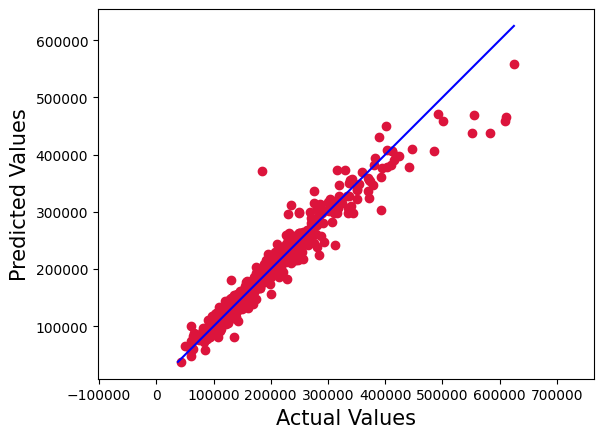

In [8]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(cb_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-9-9e03f58b62ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-cb_pred),bins=100);


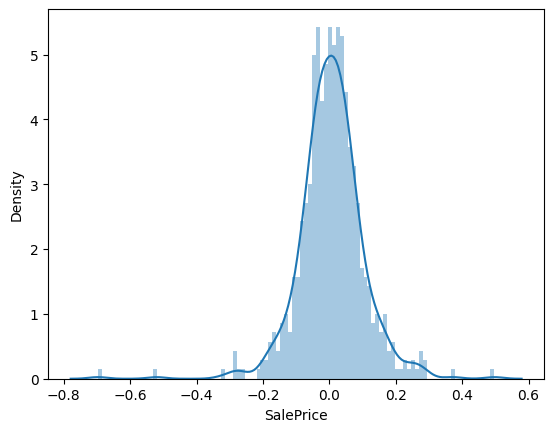

In [9]:
sb.distplot((y_test-cb_pred),bins=100);

In [10]:
# catboost optuna hyperparameter tuning
def objective(trial):
    # Define hyperparameter search space
    param = {
        "iterations": trial.suggest_int("iterations", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
        "depth": trial.suggest_int("depth", 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.05, 1.0),
        "colsample_bylevel": trial.suggest_uniform("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }
    # Train model
    model = cb.CatBoostRegressor(**param)
    model.fit(x_train, y_train, eval_set=[(x_test, y_test)],  verbose=False)

    # Predict and evaluate
    predict = model.predict(x_test)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    return rmse  # Minimize RMSE

# Run Optuna optimization
study = optuna.create_study(direction='minimize')  # Minimize RMSE
study.optimize(objective, n_trials=50)

print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
# Print best hyperparameters
print("Best RMSE:", study.best_value)
print("Best Hyperparameters:", study.best_params)


[I 2025-03-24 18:06:31,594] A new study created in memory with name: no-name-d927295b-92d4-4f8b-97a2-dd36ce43133c
<ipython-input-10-ed404377447c>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.05, 1.0),
<ipython-input-10-ed404377447c>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "colsample_bylevel": trial.suggest_uniform("colsample_bylevel", 0.05, 1.0),
[I 2025-03-24 18:06:32,176] Trial 0 finished with value: 0.11333710315384488 and parameters: {'iterations': 142, 'learning_rate': 0.06152301169800452, 'depth': 6, 'subsample': 0.42315172083324465, 'colsample_bylevel': 0.3749440959477353, 'min_data_in_leaf': 67}. Best is trial 0 with value: 0.113337103

Number of finished trials: 50
Best trial:
Best RMSE: 0.0979234444391601
Best Hyperparameters: {'iterations': 482, 'learning_rate': 0.08107415684745473, 'depth': 5, 'subsample': 0.5457166751127225, 'colsample_bylevel': 0.5924207148345435, 'min_data_in_leaf': 45}


In [16]:
cb_mod = cb.CatBoostRegressor(iterations= 482, learning_rate= 0.08107415684745473, depth= 5, subsample= 0.5457166751127225, colsample_bylevel = 0.5924207148345435,
                              min_data_in_leaf = 45)
cb_mod.fit(x_train, y_train)
cb_pred = cb_mod.predict(x_test)

0:	learn: 0.3813604	total: 3.5ms	remaining: 1.68s
1:	learn: 0.3630659	total: 6.55ms	remaining: 1.57s
2:	learn: 0.3448126	total: 9.57ms	remaining: 1.53s
3:	learn: 0.3281386	total: 12.5ms	remaining: 1.49s
4:	learn: 0.3136145	total: 15.3ms	remaining: 1.46s
5:	learn: 0.3009147	total: 18.2ms	remaining: 1.45s
6:	learn: 0.2879670	total: 21.2ms	remaining: 1.44s
7:	learn: 0.2766614	total: 24ms	remaining: 1.42s
8:	learn: 0.2660070	total: 26.9ms	remaining: 1.41s
9:	learn: 0.2557830	total: 29.7ms	remaining: 1.4s
10:	learn: 0.2473624	total: 33.9ms	remaining: 1.45s
11:	learn: 0.2376536	total: 38.5ms	remaining: 1.51s
12:	learn: 0.2295294	total: 42.4ms	remaining: 1.53s
13:	learn: 0.2224221	total: 45.1ms	remaining: 1.51s
14:	learn: 0.2155550	total: 47.9ms	remaining: 1.49s
15:	learn: 0.2092243	total: 50.6ms	remaining: 1.47s
16:	learn: 0.2033097	total: 53.3ms	remaining: 1.46s
17:	learn: 0.1978176	total: 56ms	remaining: 1.44s
18:	learn: 0.1925800	total: 58.6ms	remaining: 1.43s
19:	learn: 0.1881853	total: 

In [17]:
cb_mod_sc=cb_mod.score(x_train,y_train)
print('CB Regression Model Score  : ',round(cb_mod_sc,3))
r2=r2_score(y_test,cb_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,cb_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,cb_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, cb_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(cb_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") #(91.32)
# Accuracy of moadel based on parameter supplied by optuna

CB Regression Model Score  :  0.975
R Sq. Value :  0.95
Adjusted R Sq. Value is :  0.943
Mean Square Error is :  0.01
Root Mean Square Error is :  0.098
Mean Absoulue Error is :  0.069
0:	learn: 0.3799664	total: 3.29ms	remaining: 1.58s
1:	learn: 0.3618749	total: 7.28ms	remaining: 1.75s
2:	learn: 0.3450762	total: 10.3ms	remaining: 1.64s
3:	learn: 0.3276531	total: 13ms	remaining: 1.56s
4:	learn: 0.3133644	total: 16.1ms	remaining: 1.53s
5:	learn: 0.2979501	total: 19.2ms	remaining: 1.52s
6:	learn: 0.2859030	total: 22.2ms	remaining: 1.51s
7:	learn: 0.2731755	total: 25.3ms	remaining: 1.5s
8:	learn: 0.2613895	total: 28.3ms	remaining: 1.49s
9:	learn: 0.2511184	total: 31.9ms	remaining: 1.51s
10:	learn: 0.2423757	total: 34.8ms	remaining: 1.49s
11:	learn: 0.2334659	total: 37.5ms	remaining: 1.47s
12:	learn: 0.2244042	total: 40.4ms	remaining: 1.46s
13:	learn: 0.2174375	total: 43.4ms	remaining: 1.45s
14:	learn: 0.2106267	total: 46.4ms	remaining: 1.44s
15:	learn: 0.2039156	total: 49.5ms	remaining: 1.

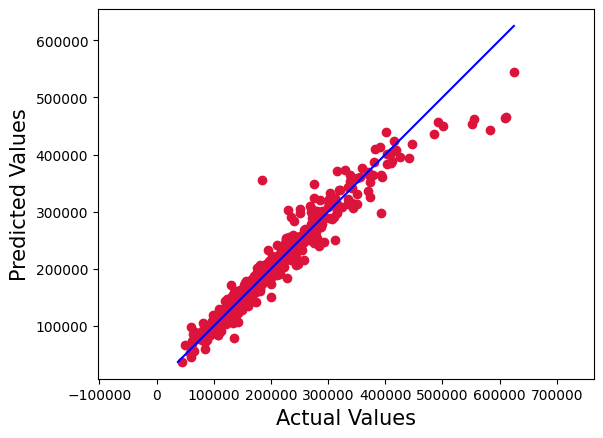

In [18]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(cb_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-19-9e03f58b62ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-cb_pred),bins=100);


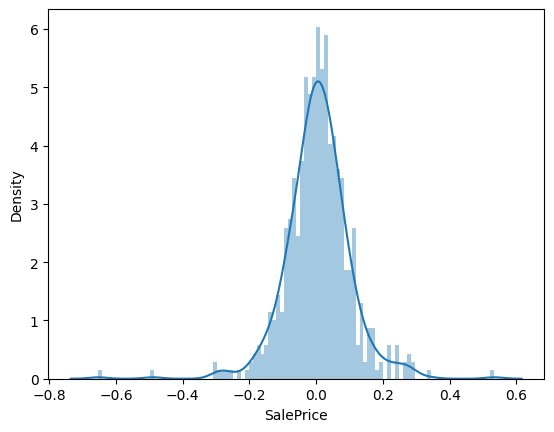

In [19]:
sb.distplot((y_test-cb_pred),bins=100);

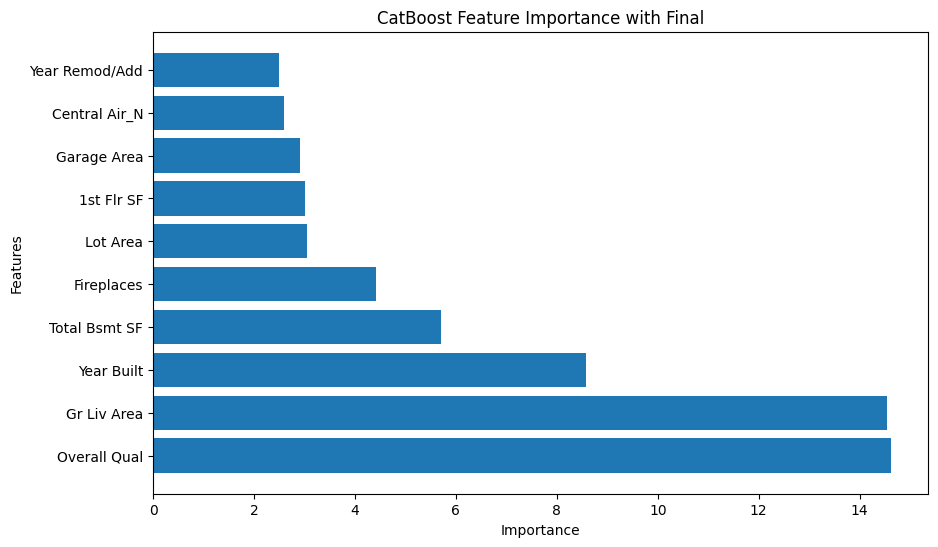

In [20]:
importances = cb_mod.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=x.columns).sort_values(ascending = False)[:10]
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance with Final')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()